In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
from openskill.models import PlackettLuce

In [ ]:
model = PlackettLuce(beta=25.0/120.0)


teamA = [model.create_rating([33.12768461284079, 5.463934691332124]),
         model.create_rating([32.748743338463136, 6.747616870039725]),
         model.create_rating([30.120552427300684, 6.392412847414389])]
teamB = [model.create_rating([29.05527791129905, 1.6096444279123752]),
         model.create_rating([28.01958023631609, 1.7693547788151567]),
         model.create_rating([26.91504500354296, 1.7008684555470728])]
print(model.predict_win([teamA, teamB]))
print([round(r.ordinal(target=1000, alpha=25)) for r in teamA])
print([round(r.ordinal(target=1000, alpha=25)) for r in teamB])

[0.8586254029903088, 0.14137459700969124]
[1418, 1313, 1274]
[1606, 1568, 1545]


In [11]:
df = pd.DataFrame([{'mu': p.mu, 'sigma': p.sigma} for p in teamA + teamB])
df["ordinal"] = [p.ordinal() for p in teamA + teamB]
df

,mu,sigma,ordinal
0,33.127685,5.463935,16.735881
1,32.748743,6.747617,12.505893
2,30.120552,6.392413,10.943314
3,29.055278,1.609644,24.226345
4,28.019580,1.769355,22.711516
5,26.915045,1.700868,21.812440


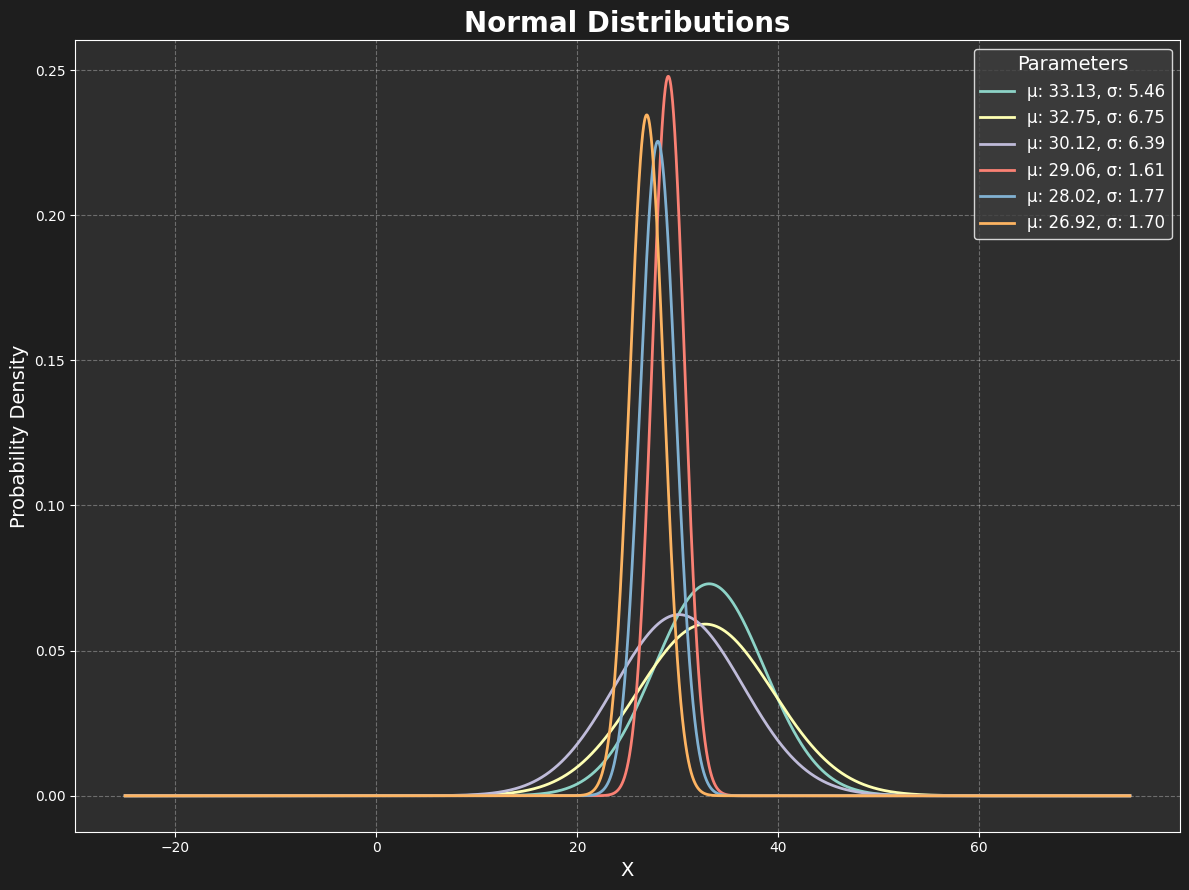

In [12]:
visualization_data = np.arange(-25, 75, 0.001)
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(12, 9), dpi=100)
fig.patch.set_facecolor("#1E1E1E")
ax.set_facecolor("#2E2E2E")

df.apply(
    lambda row: ax.plot(
        visualization_data,
        norm.pdf(visualization_data, row["mu"], row["sigma"]),
        label=f"μ: {row['mu']:.2f}, σ: {row['sigma']:.2f}",
        linewidth=2,
    ),
    axis=1,
)

ax.set_title("Normal Distributions", fontsize=20, color="white", fontweight="bold")
ax.set_xlabel("X", fontsize=14, color="white")
ax.set_ylabel("Probability Density", fontsize=14, color="white")
ax.tick_params(colors="white", which="both")
ax.grid(True, linestyle="--", alpha=0.3)

legend = ax.legend(title="Parameters", title_fontsize=14, fontsize=12)
legend.get_frame().set_facecolor("#3E3E3E")
legend.get_frame().set_edgecolor("white")
plt.setp(legend.get_texts(), color="white")
plt.setp(legend.get_title(), color="white")
plt.tight_layout()
plt.show()